In [1]:
import cv2
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
labels = pd.read_csv("./labels.csv")

In [3]:
labels.columns

Index(['file_name', 'height', 'width', 'bbox', 'age', 'race', 'masked',
       'skintone', 'emotion', 'gender'],
      dtype='object')

In [4]:
def bbox_convert(row):
    bbox = np.array(row[1:-1].split(", "), dtype=np.float32)
    bbox = bbox.astype(np.int16)
    return bbox

In [21]:
def RGB_extract(row):
    filename = row['file_name']
    image = cv2.imread(os.path.join("./mnt/md0/projects/sami-hackathon/private/data/", filename))
    bbox = bbox_convert(row['bbox'])
    image = image[bbox[1]:bbox[1]+bbox[3], bbox[0]:bbox[0]+bbox[2]]
    B = 0
    G = 0
    R = 0
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            B += image[x, y, 0]
            G += image[x, y, 1]
            R += image[x, y, 2]
    pixels = image.shape[0] * image.shape[1]
    return f"{int(B/pixels)}, {int(G/pixels)}, {int(R/pixels)}"

In [22]:
unmasked_data = labels[labels.masked == "unmasked"]

In [23]:
unmasked_data = unmasked_data.sample(n=300)

In [24]:
unmasked_data.head()

,file_name,height,width,bbox,age,race,masked,skintone,emotion,gender
11007,81713280.jpg,2000,1333,"[602.0288718952621, 893.9999999999964, 193.962...",Kid,Caucasian,unmasked,light,Happiness,Female
8491,71911056.jpg,1333,2000,"[1000.0000000000002, 142.664571459139, 135.512...",20-30s,Caucasian,unmasked,mid-light,Happiness,Female
12718,88852424.jpg,2000,1333,"[539.0081255201175, 281.4217315771756, 158.180...",20-30s,Mongoloid,unmasked,light,Happiness,Male
13288,94901496.jpg,1201,2000,"[819.0718954248368, 471.99999999999915, 259.68...",20-30s,Mongoloid,unmasked,light,Sadness,Male
108,101917223.jpg,1333,2000,"[1312.0000000000016, 274.58490450115096, 225.8...",20-30s,Caucasian,unmasked,light,Happiness,Female


In [25]:
unmasked_data['rgb_mean'] = unmasked_data.apply(RGB_extract, axis=1)

In [26]:
unmasked_data.head()

,file_name,height,width,bbox,age,race,masked,skintone,emotion,gender,rgb_mean
11007,81713280.jpg,2000,1333,"[602.0288718952621, 893.9999999999964, 193.962...",Kid,Caucasian,unmasked,light,Happiness,Female,"146, 157, 189"
8491,71911056.jpg,1333,2000,"[1000.0000000000002, 142.664571459139, 135.512...",20-30s,Caucasian,unmasked,mid-light,Happiness,Female,"72, 96, 157"
12718,88852424.jpg,2000,1333,"[539.0081255201175, 281.4217315771756, 158.180...",20-30s,Mongoloid,unmasked,light,Happiness,Male,"112, 133, 162"
13288,94901496.jpg,1201,2000,"[819.0718954248368, 471.99999999999915, 259.68...",20-30s,Mongoloid,unmasked,light,Sadness,Male,"129, 148, 191"
108,101917223.jpg,1333,2000,"[1312.0000000000016, 274.58490450115096, 225.8...",20-30s,Caucasian,unmasked,light,Happiness,Female,"119, 143, 175"


In [31]:
unmasked_data[unmasked_data.race == "Caucasian"]

,file_name,height,width,bbox,age,race,masked,skintone,emotion,gender,rgb_mean
11007,81713280.jpg,2000,1333,"[602.0288718952621, 893.9999999999964, 193.962...",Kid,Caucasian,unmasked,light,Happiness,Female,"146, 157, 189"
8491,71911056.jpg,1333,2000,"[1000.0000000000002, 142.664571459139, 135.512...",20-30s,Caucasian,unmasked,mid-light,Happiness,Female,"72, 96, 157"
108,101917223.jpg,1333,2000,"[1312.0000000000016, 274.58490450115096, 225.8...",20-30s,Caucasian,unmasked,light,Happiness,Female,"119, 143, 175"
4772,58229802.jpg,1054,2000,"[604.6568467645333, 7.734505991655314e-29, 419...",20-30s,Caucasian,unmasked,light,Happiness,Female,"147, 171, 198"
3463,48103628.jpg,1333,2000,"[301.3387565762463, 312.7027414505028, 206.289...",20-30s,Caucasian,unmasked,mid-light,Neutral,Female,"76, 88, 114"
...,...,...,...,...,...,...,...,...,...,...,...
5770,62611479.jpg,666,2000,"[884.7104047059378, 9.597127192849948e-17, 276...",20-30s,Caucasian,unmasked,light,Happiness,Female,"110, 122, 169"
5053,59609642.jpg,1000,2000,"[339.7728819398843, 181.04918399677328, 185.50...",20-30s,Caucasian,unmasked,light,Surprise,Male,"87, 105, 156"
6890,66650133.jpg,1333,2000,"[833.6341463414628, 235.5073170731707, 560.983...",20-30s,Caucasian,unmasked,mid-light,Happiness,Female,"131, 150, 183"
9476,75725733.jpg,2000,1333,"[559.4763553769607, 249.81369182289586, 142.42...",20-30s,Caucasian,unmasked,mid-light,Neutral,Male,"100, 117, 150"


In [33]:
unmasked_data.to_csv("unmasked_300.csv")

In [35]:
for idx, label in unmasked_data.iterrows():
    filename = label['file_name']
    image = cv2.imread(os.path.join("./mnt/md0/projects/sami-hackathon/private/data/", filename))
    cv2.imwrite(os.path.join("./unmasked_300/", filename), image)

In [36]:
caucasian = unmasked_data[unmasked_data.race == "Caucasian"]

In [38]:
for idx, row in caucasian.iterrows():
    filename = row['file_name']
    image = cv2.imread(os.path.join("./mnt/md0/projects/sami-hackathon/private/data/", filename))
    cv2.imwrite(os.path.join("./unmasked_300/Caucasian/", filename), image)

In [43]:
negroid = unmasked_data[unmasked_data.race == "Negroid"]

In [46]:
negroid.describe()

,height,width
count,12.000000,12.000000
mean,1344.833333,1888.833333
std,393.813946,259.629398
min,506.000000,1333.000000
25%,1333.000000,2000.000000
50%,1333.000000,2000.000000
75%,1333.250000,2000.000000
max,2000.000000,2000.000000


In [45]:
for idx, row in negroid.iterrows():
    filename = row['file_name']
    image = cv2.imread(os.path.join("./mnt/md0/projects/sami-hackathon/private/data/", filename))
    cv2.imwrite(os.path.join("./unmasked_300/Negroid/", filename), image)

In [47]:
labels[labels.file_name == "84492302.jpg"]

,file_name,height,width,bbox,age,race,masked,skintone,emotion,gender
11741,84492302.jpg,506,2000,"[917.7215189873414, 80.64374999999998, 167.721...",20-30s,Negroid,unmasked,dark,Happiness,Male


In [48]:
mongoloid = unmasked_data[unmasked_data.race == "Mongoloid"]

In [49]:
for idx, row in mongoloid.iterrows():
    filename = row['file_name']
    image = cv2.imread(os.path.join("./mnt/md0/projects/sami-hackathon/private/data/", filename))
    cv2.imwrite(os.path.join("./unmasked_300/Mongoloid/", filename), image)

In [50]:
mongoloid.describe()

,height,width
count,131.000000,131.000000
mean,1458.267176,1800.778626
std,322.959841,326.110512
min,705.000000,1024.000000
25%,1333.000000,1334.000000
50%,1333.000000,2000.000000
75%,1347.000000,2000.000000
max,2000.000000,2000.000000


In [52]:
labels[labels.file_name == "77258019.jpg"]

,file_name,height,width,bbox,age,race,masked,skintone,emotion,gender
9906,77258019.jpg,1277,2000,"[1626.014860049342, 105.99999999999986, 170.98...",20-30s,Mongoloid,unmasked,mid-light,Neutral,Female
9907,77258019.jpg,1277,2000,"[412.45122512784104, 263.4930181748677, 108.17...",20-30s,Mongoloid,unmasked,mid-light,Neutral,Female
9908,77258019.jpg,1277,2000,"[1018.6164931525473, 173.75725542646038, 85.32...",20-30s,Mongoloid,unmasked,mid-light,Neutral,Female


Sample of 300 unmasked data has been extracted

In [53]:
masked_data = labels[labels.masked == "masked"]

In [55]:
masked_data.describe()

,height,width
count,504.000000,504.000000
mean,1408.392857,1895.204365
std,267.497698,243.506320
min,668.000000,1000.000000
25%,1333.000000,2000.000000
50%,1333.000000,2000.000000
75%,1334.000000,2000.000000
max,2177.000000,2000.000000


In [56]:
masked_data = masked_data.sample(n=300)

In [57]:
for idx, label in masked_data.iterrows():
    filename = label['file_name']
    image = cv2.imread(os.path.join("./mnt/md0/projects/sami-hackathon/private/data/", filename))
    cv2.imwrite(os.path.join("./masked_300/", filename), image)

In [58]:
labels[labels.file_name == "68241751.jpg"]

,file_name,height,width,bbox,age,race,masked,skintone,emotion,gender
7412,68241751.jpg,1333,2000,"[1058.0426242169772, 0.0, 272.09015918633, 387...",Teenager,Mongoloid,masked,mid-light,Happiness,Female


In [59]:
labels[labels.file_name == "68841112.jpg"]

,file_name,height,width,bbox,age,race,masked,skintone,emotion,gender
7623,68841112.jpg,1333,2000,"[1272.3733412692043, 302.4545454545457, 180.90...",40-50s,Mongoloid,masked,mid-light,Neutral,Female


In [60]:
caucasian = masked_data[masked_data.race == "Caucasian"]

In [61]:
for idx, row in caucasian.iterrows():
    filename = row['file_name']
    image = cv2.imread(os.path.join("./mnt/md0/projects/sami-hackathon/private/data/", filename))
    cv2.imwrite(os.path.join("./masked_300/Caucasian/", filename), image)

In [64]:
negroid = masked_data[masked_data.race == "Negroid"]

In [65]:
for idx, row in negroid.iterrows():
    filename = row['file_name']
    image = cv2.imread(os.path.join("./mnt/md0/projects/sami-hackathon/private/data/", filename))
    cv2.imwrite(os.path.join("./masked_300/Negroid/", filename), image)

In [66]:
mongoloid = masked_data[masked_data.race == "Mongoloid"]

In [67]:
for idx, row in mongoloid.iterrows():
    filename = row['file_name']
    image = cv2.imread(os.path.join("./mnt/md0/projects/sami-hackathon/private/data/", filename))
    cv2.imwrite(os.path.join("./masked_300/Mongoloid/", filename), image)

In [69]:
masked_data['rgb_mean'] = masked_data.apply(RGB_extract, axis=1)

In [70]:
masked_data.head()

,file_name,height,width,bbox,age,race,masked,skintone,emotion,gender,rgb_mean
7967,70021640.jpg,1333,2000,"[582.5389346672732, 165.67560195796406, 431.33...",20-30s,Mongoloid,masked,mid-light,Surprise,Female,"125, 122, 129"
3246,4704114.jpg,2000,1333,"[563.7551106980403, 870.2607365949766, 561.809...",20-30s,Mongoloid,masked,light,Neutral,Female,"206, 206, 213"
8306,71054446.jpg,1333,2000,"[1133.8603409201944, 196.722257425155, 163.691...",20-30s,Caucasian,masked,light,Neutral,Female,"66, 76, 97"
6083,63610261.jpg,1330,2000,"[588.0082644628094, 69.0, 338.1157024793395, 4...",20-30s,Mongoloid,masked,light,Neutral,Female,"175, 180, 184"
9889,77204902.jpg,1108,1478,"[706.9999999999986, 256.9999999999999, 298.000...",20-30s,Mongoloid,masked,light,Neutral,Female,"121, 132, 148"


In [71]:
masked_data.to_csv("masked_300.csv")

Attach RGB mean value to original image

In [72]:
unmasked_data

,file_name,height,width,bbox,age,race,masked,skintone,emotion,gender,rgb_mean
11007,81713280.jpg,2000,1333,"[602.0288718952621, 893.9999999999964, 193.962...",Kid,Caucasian,unmasked,light,Happiness,Female,"146, 157, 189"
8491,71911056.jpg,1333,2000,"[1000.0000000000002, 142.664571459139, 135.512...",20-30s,Caucasian,unmasked,mid-light,Happiness,Female,"72, 96, 157"
12718,88852424.jpg,2000,1333,"[539.0081255201175, 281.4217315771756, 158.180...",20-30s,Mongoloid,unmasked,light,Happiness,Male,"112, 133, 162"
13288,94901496.jpg,1201,2000,"[819.0718954248368, 471.99999999999915, 259.68...",20-30s,Mongoloid,unmasked,light,Sadness,Male,"129, 148, 191"
108,101917223.jpg,1333,2000,"[1312.0000000000016, 274.58490450115096, 225.8...",20-30s,Caucasian,unmasked,light,Happiness,Female,"119, 143, 175"
...,...,...,...,...,...,...,...,...,...,...,...
579,12431658.jpg,2000,1333,"[841.8053968276804, 374.57617667251037, 120.64...",20-30s,Mongoloid,unmasked,light,Happiness,Female,"134, 154, 167"
6890,66650133.jpg,1333,2000,"[833.6341463414628, 235.5073170731707, 560.983...",20-30s,Caucasian,unmasked,mid-light,Happiness,Female,"131, 150, 183"
9476,75725733.jpg,2000,1333,"[559.4763553769607, 249.81369182289586, 142.42...",20-30s,Caucasian,unmasked,mid-light,Neutral,Male,"100, 117, 150"
7031,67040535.jpg,1333,2000,"[1139.1554097852834, 390.77251445302346, 140.3...",40-50s,Caucasian,unmasked,mid-light,Happiness,Male,"133, 142, 161"


In [75]:
rgbmean = unmasked_data.iloc[0, -1].split(", ")

In [78]:
tuple(int(i) for i in rgbmean)

(146, 157, 189)

In [85]:
for idx, row in unmasked_data.iterrows():
    color = tuple(int(i) for i in row['rgb_mean'].split(", "))
    filename = row['file_name']
    image = cv2.imread(os.path.join("./mnt/md0/projects/sami-hackathon/private/data/", filename))
    image[:200, :200] = color
    intense = color[0] * 0.114 + color[1] * 0.587 + color[2] * 0.299
    image = cv2.putText(image, str(intense), (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
    bbox = bbox_convert(row['bbox'])
    image = cv2.rectangle(image, (bbox[0], bbox[1]), (bbox[0] + bbox[2], bbox[1] + bbox[3]), (255, 255, 0), 5)
    cv2.imwrite(os.path.join("./unmasked_300/mean_attached", filename), image)

In [84]:
for idx, row in masked_data.iterrows():
    color = tuple(int(i) for i in row['rgb_mean'].split(", "))
    filename = row['file_name']
    image = cv2.imread(os.path.join("./mnt/md0/projects/sami-hackathon/private/data/", filename))
    image[:200, :200] = color
    
    bbox = bbox_convert(row['bbox'])
    image = cv2.rectangle(image, (bbox[0], bbox[1]), (bbox[0] + bbox[2], bbox[1] + bbox[3]), (255, 255, 0), 5)
    cv2.imwrite(os.path.join("./masked_300/mean_attached", filename), image)

In [86]:
import seaborn as sns

In [90]:
def grayscale(row):
    color = tuple(int(i) for i in row['rgb_mean'].split(", "))
    intense = color[0] * 0.114 + color[1] * 0.587 + color[2] * 0.299
    return int(intense)

In [91]:
unmasked_data['gray'] = unmasked_data.apply(grayscale, axis=1)

In [92]:
unmasked_data.head()

,file_name,height,width,bbox,age,race,masked,skintone,emotion,gender,rgb_mean,gray
11007,81713280.jpg,2000,1333,"[602.0288718952621, 893.9999999999964, 193.962...",Kid,Caucasian,unmasked,light,Happiness,Female,"146, 157, 189",165
8491,71911056.jpg,1333,2000,"[1000.0000000000002, 142.664571459139, 135.512...",20-30s,Caucasian,unmasked,mid-light,Happiness,Female,"72, 96, 157",111
12718,88852424.jpg,2000,1333,"[539.0081255201175, 281.4217315771756, 158.180...",20-30s,Mongoloid,unmasked,light,Happiness,Male,"112, 133, 162",139
13288,94901496.jpg,1201,2000,"[819.0718954248368, 471.99999999999915, 259.68...",20-30s,Mongoloid,unmasked,light,Sadness,Male,"129, 148, 191",158
108,101917223.jpg,1333,2000,"[1312.0000000000016, 274.58490450115096, 225.8...",20-30s,Caucasian,unmasked,light,Happiness,Female,"119, 143, 175",149


<Axes: xlabel='gray'>

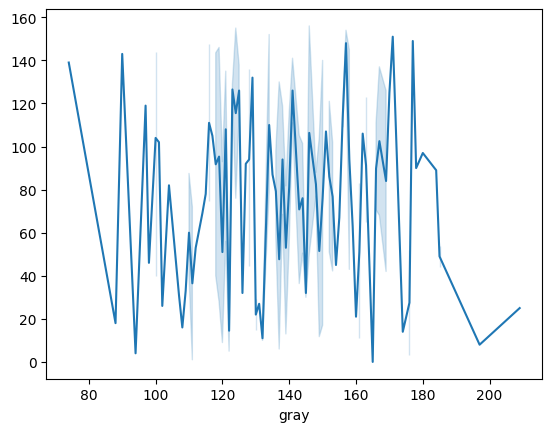

In [97]:
sns.lineplot(unmasked_data[unmasked_data.race == "Caucasian"], x='gray', y=np.arange(len(unmasked_data[unmasked_data.race == "Caucasian"])))

<Axes: xlabel='gray'>

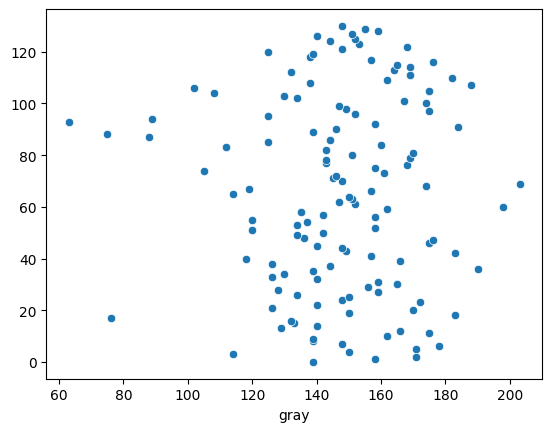

In [99]:
sns.lineplot(unmasked_data[unmasked_data.race == "Mongoloid"], x='gray', y=np.arange(len(unmasked_data[unmasked_data.race == "Mongoloid"])))

<Axes: xlabel='gray'>

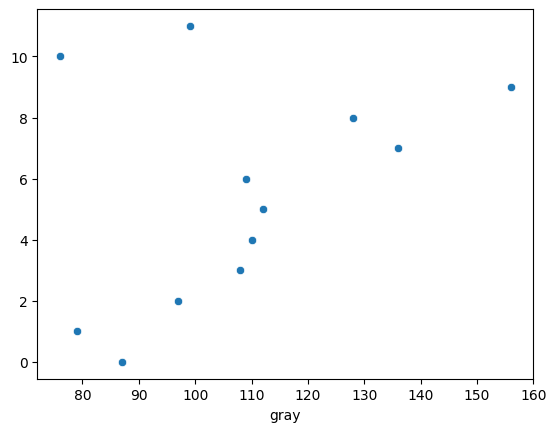

In [101]:
sns.scatterplot(unmasked_data[unmasked_data.race == "Negroid"], x='gray', y=np.arange(len(unmasked_data[unmasked_data.race == "Negroid"])))